## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [0]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
def build_mlp():
  input_layer = keras.layers.Input([x_train.shape[-1]])
  x = keras.layers.Dense(units =512, activation = "relu")(input_layer)
  x = keras.layers.Dense(units =256, activation = "relu")(x)
  x = keras.layers.Dense(units =128, activation = "relu")(x)
  x =keras.layers.Dense(units =64, activation = "relu")(x)
  out = keras.layers.Dense(units =10, activation = "softmax")(x)
  model = keras.models.Model(inputs =[input_layer], outputs=[out])
  return model


In [13]:
model = build_mlp()

# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


W0806 08:17:40.620052 140182265927552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 08:17:40.695524 140182265927552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0806 08:17:40.708688 140182265927552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________________________


In [14]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0806 08:17:49.982752 140182265927552 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0806 08:17:50.041456 140182265927552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 117us/step - loss: 2.2623 - acc: 0.1590 - val_loss: 2.2155 - val_acc: 0.1811
Epoch 2/500
50000/50000 [==============================] - 2s 39us/step - loss: 2.1869 - acc: 0.1862 - val_loss: 2.1608 - val_acc: 0.1921
Epoch 3/500
50000/50000 [==============================] - 2s 39us/step - loss: 2.1369 - acc: 0.2085 - val_loss: 2.1147 - val_acc: 0.2160
Epoch 4/500
50000/50000 [==============================] - 2s 38us/step - loss: 2.0936 - acc: 0.2387 - val_loss: 2.0741 - val_acc: 0.2538
Epoch 5/500
50000/50000 [==============================] - 2s 39us/step - loss: 2.0553 - acc: 0.2686 - val_loss: 2.0389 - val_acc: 0.2730
Epoch 6/500
50000/50000 [==============================] - 2s 38us/step - loss: 2.0238 - acc: 0.2868 - val_loss: 2.0103 - val_acc: 0.2894
Epoch 7/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.9976 - acc: 0.3009 - val_loss: 1.9859 -

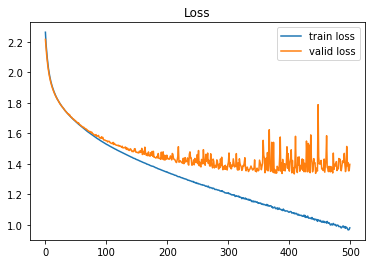

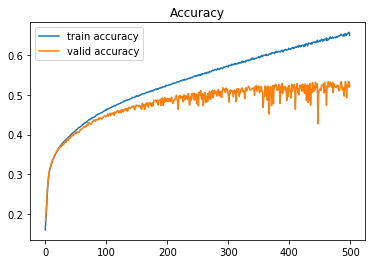

In [15]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()